In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

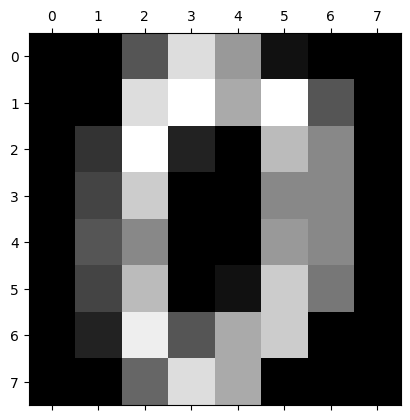

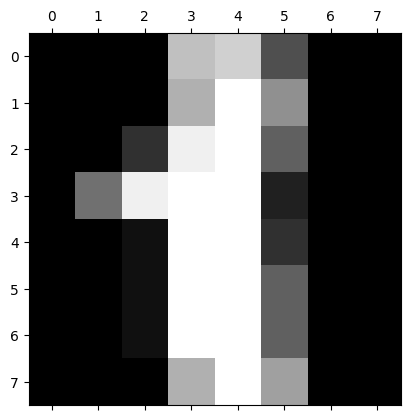

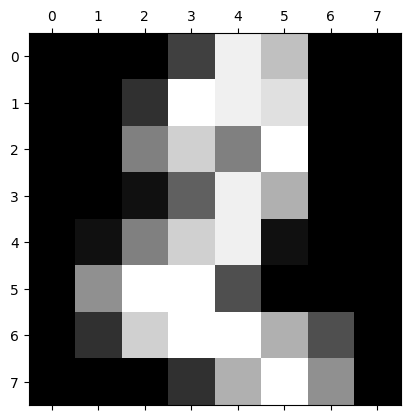

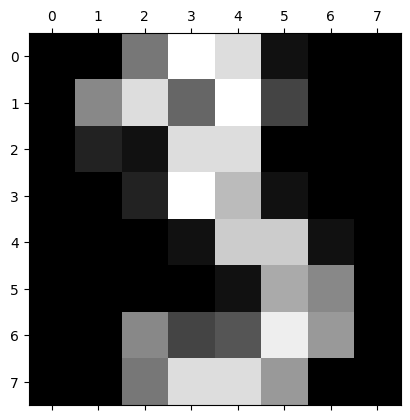

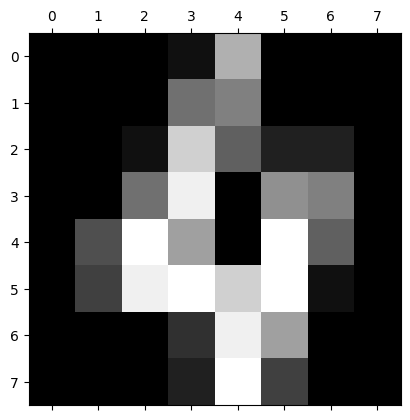

In [6]:
#to see a particular element
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:5] # we can use data and target to train our model as these target values
#are given for the image 

array([0, 1, 2, 3, 4])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [10]:
#the data model gets for training should be different that the data for testig to avoid overfitting

In [11]:
len(x_train)

1437

In [12]:
len(x_test)

360

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)

In [14]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [15]:
model.score(x_train,y_train)

1.0

In [16]:
model.score(x_test,y_test)

0.975

In [19]:
model.predict([digits.data[4]])

array([4])

In [20]:
model.predict([digits.data[44]])

array([7])

In [21]:
model.predict([digits.data[67]])

array([6])

In [22]:
model.predict(digits.data[0:8])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
#my score is 0.97 . Now i want to know where my model didnt do well.
#to see where my model didnt do well i'll use confusion matrix

In [26]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
c

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 30]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

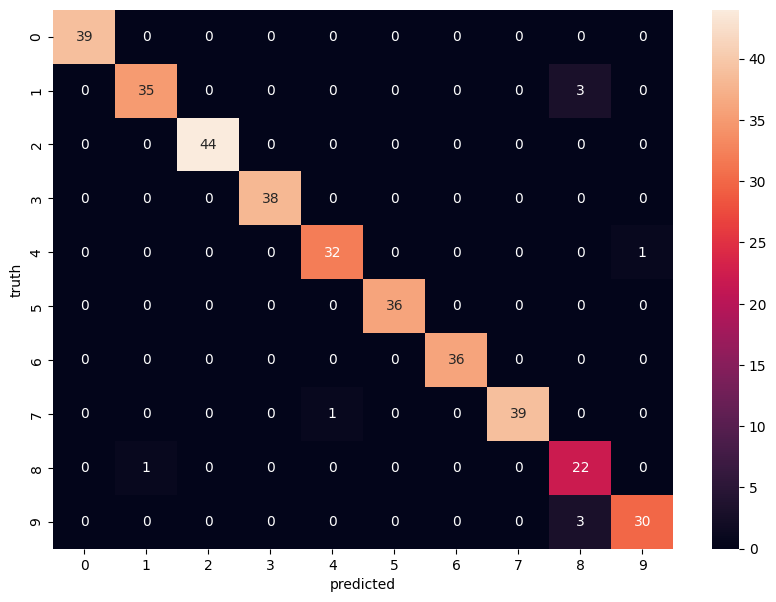

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')